# Problem Statement

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%.

# Business Goal

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Step 1: Reading and Understanding the Data

### Let us import the numpy and pandas libraries

In [1268]:
#Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [1269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1270]:
# import pandas_profile
%matplotlib inline

In [1271]:
# Importing dataset

df = pd.read_csv('C:/Users/Deepika/Documents/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1273]:
df.shape

(9240, 37)

In [1274]:

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1275]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Step2: Data Cleaning

In [1276]:
# check for percentage of null values in each column

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1277]:
# Check if there are any duplicate values in the dataset

df[df.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [1278]:
# Following columns have a value called select. Convert those values as nan since the customer has not selected any options for 
# these columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

df['Specialization'] = df['Specialization'].replace('Select', np.nan)
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select', np.nan)
df['Lead Profile'] = df['Lead Profile'].replace('Select', np.nan)
df['City'] = df['City'].replace('Select', np.nan)

In [1279]:
# check for percentage of null values in each column

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1280]:
# Let us drop the following columns that have more than 30% null values

# a) Specialization
# b) How did you hear about X Education
# c) Tags
# d) Lead Quality
# e) Lead Profile
# f) City
# g) Asymmetrique Activity Index
# h) Asymmetrique Profile Index
# i) Asymmetrique Activity Score
# j) Asymmetrique Profile Score
df = df.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [1281]:
# check for percentage of null values in each column after dropping columns having more than 30% null values

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Following columns have null values :

- Country

- Lead Source
- Total Visits
- Page Views Per Visit
- Last Activity    
- What is your current occupation
- What matters most to you in choosing a course

#### Let us see and decide whather we need to impute values in the above column or drop the columns.

In [1282]:
# Lets check the value counts for each values in the country column

df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
South Africa               4
Nigeria                    4
Kuwait                     4
Canada                     4
Sweden                     3
Bangladesh                 2
Philippines                2
Netherlands                2
Asia/Pacific Region        2
Italy                      2
Belgium                    2
Uganda                     2
Ghana                      2
China                      2
Tanzania                   1
Indonesia                  1
Kenya                      1
Malaysia                   1
Vietnam                    1
Liberia                    1
Switzerland   

In [1283]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(df[df['Country'] == 'India'])/len(df['Country']),2)
print(country_percentage)

70.26


In [1284]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we shall go ahead and drop the column

df = df.drop(['Country'], axis=1)

In [1285]:
# Check the value counts for the column Lead Source

df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
WeLearn                 1
testone                 1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64

In [1286]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')

In [1287]:
# Check the value counts for the column Total Visits

df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [1288]:
# Check the median of column 

df['TotalVisits'].median()

3.0

In [1289]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

df['TotalVisits'] = df['TotalVisits'].replace(np.nan, df['TotalVisits'].median())

In [1290]:
# Check the value counts for Page Views Per Visit

df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [1291]:
#Check the median of the column

df['Page Views Per Visit'].median()

2.0

In [1292]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0

df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan, df['Page Views Per Visit'].median())

In [1293]:
# Check the value counts for the column Last Activity

df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [1294]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category 
# called 'Not Sure' for the null values

df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Not Sure')

In [1295]:
# Check the value counts for the column "What is your current Occupation"

df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1296]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that 
# as value for the null columns

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'No Information')

In [1297]:
# Check the value counts for the column What matters most to you in choosing a course 

df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1298]:
matters_most_percentage = round(100*len(df[df['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(df['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


In [1299]:
# Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

df = df.drop(['What matters most to you in choosing a course'], axis=1)

In [1300]:
# check for percentage of null values in each column

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)


Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

##### All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data concentrated towards one value

In [1301]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

df = df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [1302]:
df.shape

(9240, 20)

### Outlier Treatment

In [1303]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


####  From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

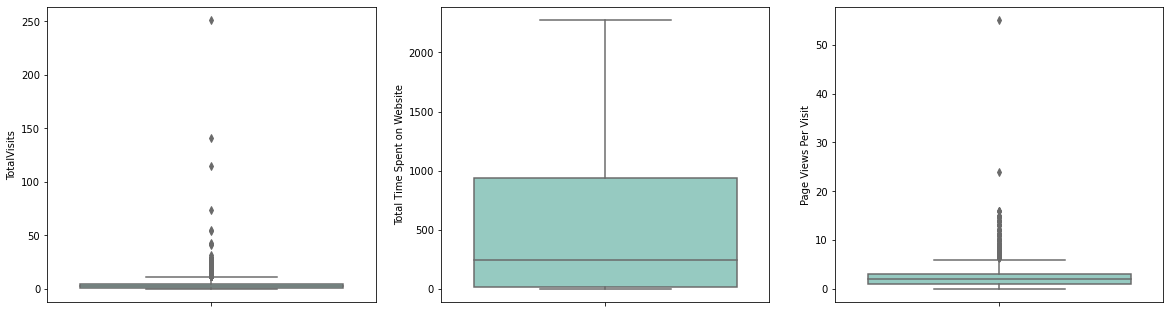

In [1304]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = df)
plt.show()

In [1305]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = df['TotalVisits'].quantile(0.99)
df = df[df["TotalVisits"] < nn_quartile_total_visits]
df["TotalVisits"].describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [1306]:
# Checking outliers at 25%,50%,75%,90%,95% and above

df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [1307]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = df['Page Views Per Visit'].quantile(0.99)
leadInfo = df[df["Page Views Per Visit"] < nn_quartile_page_visits]
df["Page Views Per Visit"].describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

count    9141.000000
mean        2.329506
std         2.046673
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [1308]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [1309]:
# Determine the percentage of data retained

num_data = round(100*(len(df)/9240),2)
print(num_data)

98.93


At this point, the data has been cleaned and around 98% of data has been retained

# Step 3: Data Analysis

####  Let us try and understand the data now based on each columns effect on the conversion rates

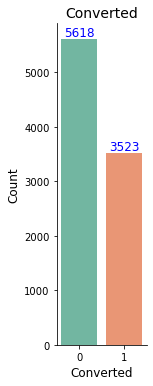

In [1310]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=df, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, there has been a overall conversion rate of around 39%

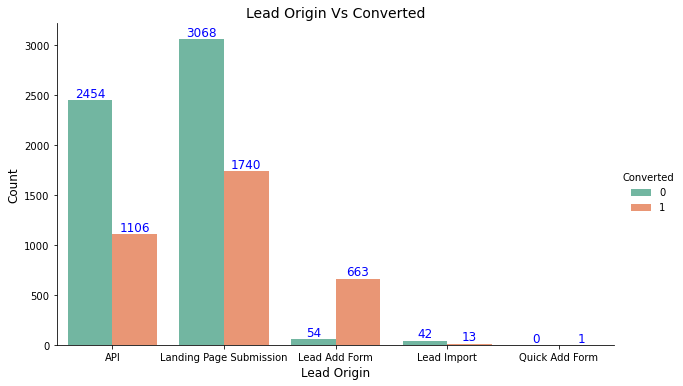

In [1311]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=df, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission Also there was only one request from quick add form which got converted.

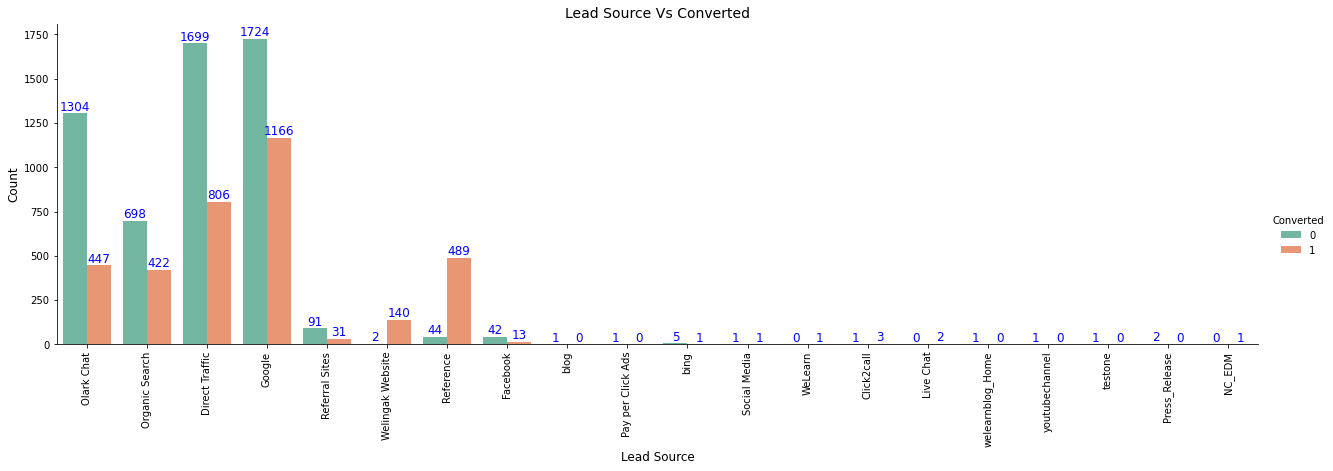

In [1312]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
   
plt.show()

From the above graph, it can be seen that major conversion in the lead source is from google

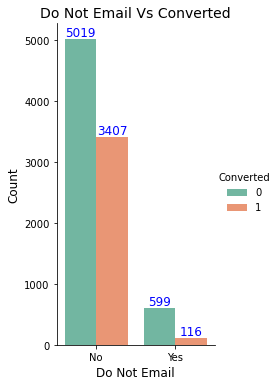

In [1313]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Based on the above graph, major conversion has happend from the emails that have been sent

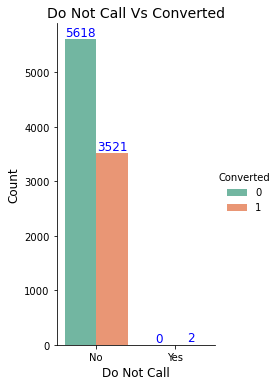

In [1314]:

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

From the above graph , it can be noticed that major conversions happened when calls were made. However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

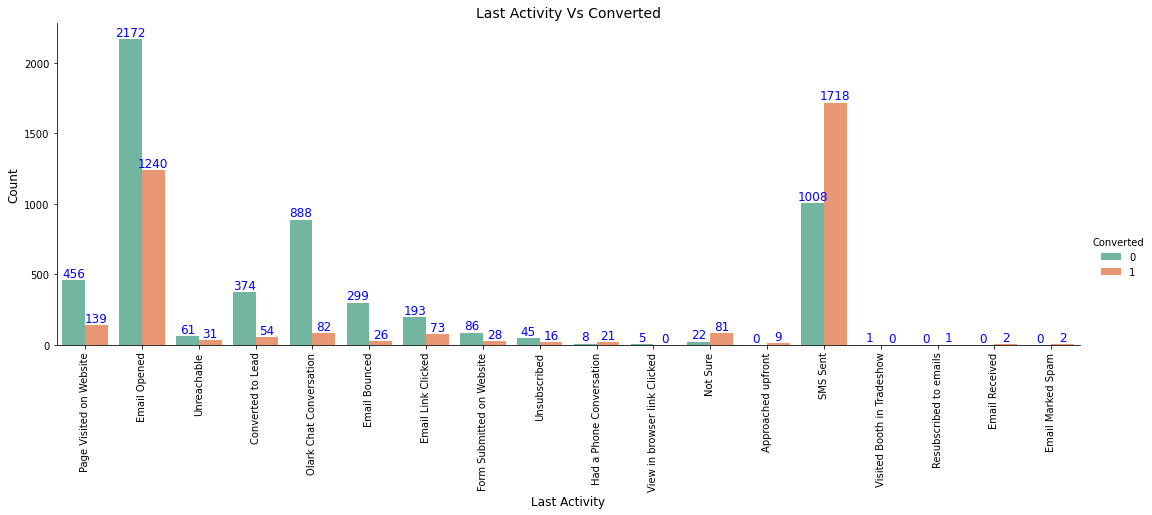

In [1315]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

As per the above graph, last activity value of 'SMS Sent' had more conversion

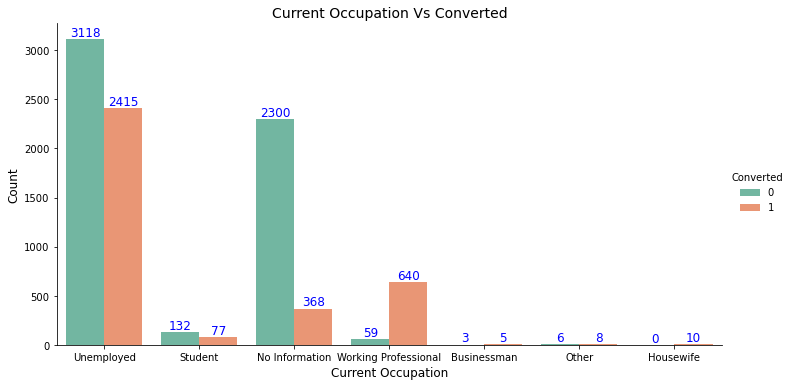

In [1316]:

# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=df, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that

- Out of 7 business men, 4 got converted
- Out 10 housewives, all 10 leads got converted.

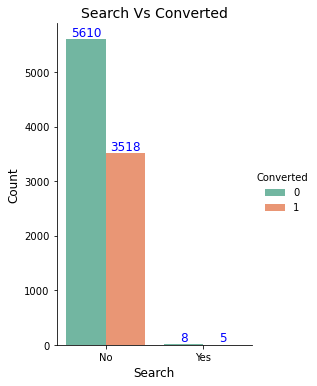

In [1317]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search

posx and posy should be finite values
posx and posy should be finite values


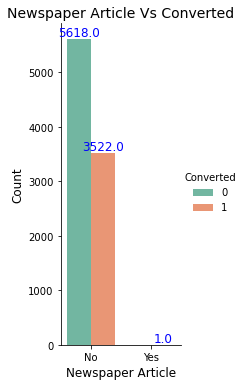

In [1318]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column

In [1319]:
# Dropping Newspaper Article

df = df.drop(['Newspaper Article'], axis=1)

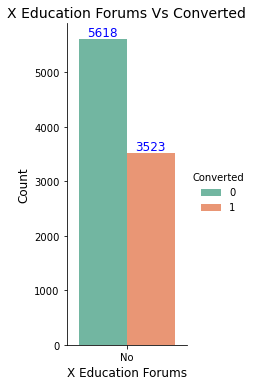

In [1320]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column

In [1321]:
# Dropping X Education Forum column

df = df.drop(['X Education Forums'], axis=1)

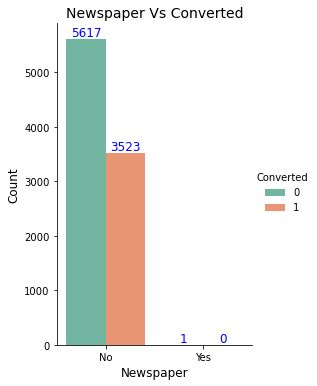

In [1322]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [1323]:
# Dropping Newspaper column

df = df.drop(['Newspaper'], axis=1)

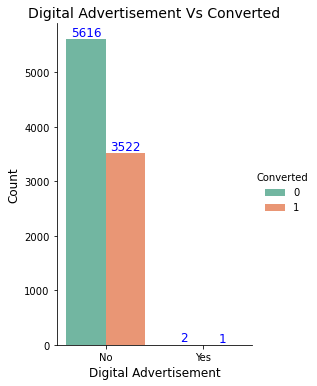

In [1324]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

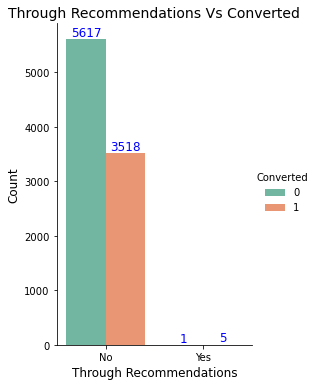

In [1325]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted

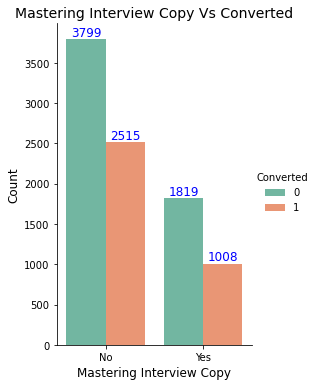

In [1326]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=df, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

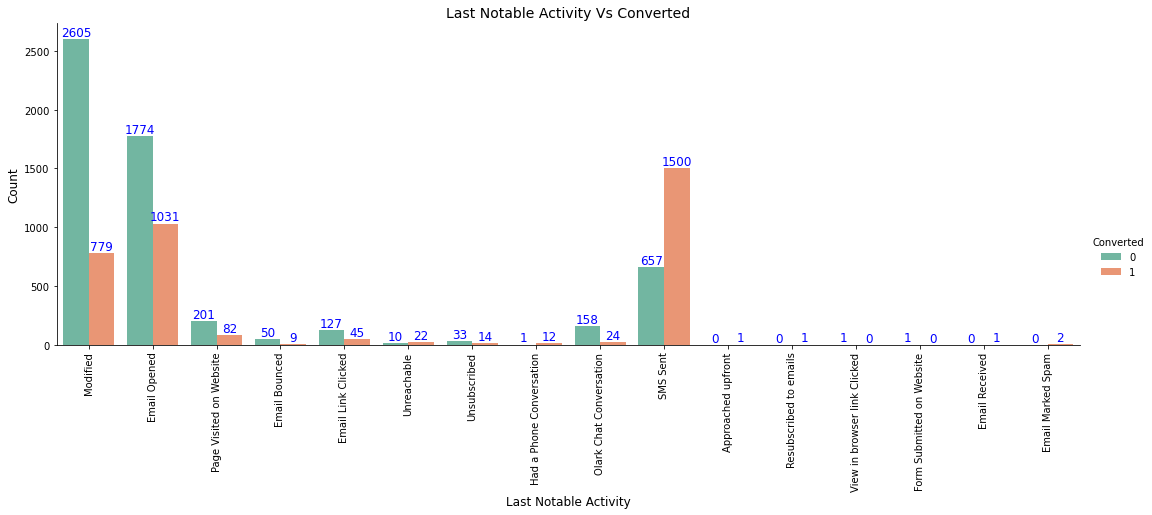

In [1327]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=df, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

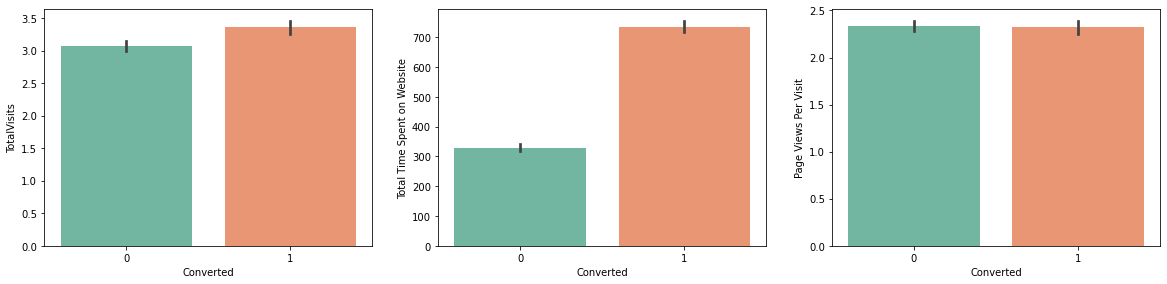

In [1328]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = df)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

# Step 4: Data Preparation - Creating Dummies

Converting some binary variables (Yes/No) to 0/1

In [1329]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
df[variablelist] = df[variablelist].apply(binary_map)

In [1330]:
# Creating dummies for the following columns below

# Lead Origin : 

d_lead_origin = pd.get_dummies(df['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
df = pd.concat([df, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(df['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(df['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(df['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(df['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,d_last_notable_activity1], axis=1)

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [1331]:
# Remove following columns from the leadInfo

# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source
# e) Last Activity
# f) What is your current occupation
# g) Last Notable Activity

df = df.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [1332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9141 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9141 non-null   int64  
 1   Do Not Call                                       9141 non-null   int64  
 2   Converted                                         9141 non-null   int64  
 3   TotalVisits                                       9141 non-null   float64
 4   Total Time Spent on Website                       9141 non-null   int64  
 5   Page Views Per Visit                              9141 non-null   float64
 6   Search                                            9141 non-null   int64  
 7   Digital Advertisement                             9141 non-null   int64  
 8   Through Recommendations                           9141 non-null   int64  
 9   A free copy of Mast

In [1333]:
# check for percentage of null values in each column

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64


In [1334]:
# check shape of the data frame

df.shape

(9141, 71)

##### Since there are around 71 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

### Step 5: Test-Train Split

In [1335]:
from sklearn.model_selection import train_test_split

In [1336]:
#Feature Variable X
X = df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1337]:
#Target Varaible y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1338]:
# Splitting the data set into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Step 6: Scaling the numeric variables using Min Max scaler

In [1339]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
1381,0,0,0.1875,0.597644,0.18750,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9105,0,0,0.0000,0.000000,0.00000,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5851,0,0,0.0000,0.000000,0.00000,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4310,0,0,0.1875,0.077934,0.09375,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5826,0,0,0.3125,0.396919,0.31250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1340]:
# Checking the Conversion Rate percentage

conversion_Rate = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion_Rate

38.54064106771688

#### We have almost 39% conversion rate

### Step 7: Feature Selection Using RFE

In [1341]:
from sklearn.linear_model import LogisticRegression

In [1342]:
lr = LogisticRegression()

In [1343]:
from sklearn.feature_selection import RFE

In [1344]:
rfe = RFE(lr,20)
rfe = rfe.fit(X_train,y_train)

In [1345]:
rfe.support_

array([ True, False,  True,  True,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
        True,  True, False, False,  True, False, False])

In [1346]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 33),
 ('Digital Advertisement', False, 6),
 ('Through Recommendations', False, 18),
 ('A free copy of Mastering The Interview', False, 49),
 ('LeadOrigin_API', False, 11),
 ('LeadOrigin_Landing Page Submission', False, 10),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 36),
 ('LeadSource_Click2call', False, 17),
 ('LeadSource_Direct Traffic', False, 20),
 ('LeadSource_Facebook', False, 14),
 ('LeadSource_Google', False, 22),
 ('LeadSource_Live Chat', False, 43),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 21),
 ('LeadSource_Pay per Click Ads', False, 31),
 ('LeadSource_Press_Release', False, 50),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 19),
 ('LeadSource_Social Media', True, 1),
 ('LeadSource_WeLearn', False, 23),


In [1347]:
col = X_train.columns[rfe.support_]


In [1348]:
# Selecting columns selected by RFE
X_train = X_train[col]

#### Building the model

In [1349]:
import statsmodels.api as sm

In [1350]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6398
Model:                            GLM   Df Residuals:                     6377
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.7
Date:                Mon, 12 Apr 2021   Deviance:                       5011.4
Time:                        14:42:55   Pearson chi2:                 6.32e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.2835      0.151    -15.150      0.000      -2.579      -1.988
Do Not Email                                    -1.1993      0.180     -6.661      0.000      -1.552      -0.846
TotalVisits                                      1.7461      0.291      5.999      0.000       1.176       2.317
Total Time Spent on Website                      4.5328      0.168     26.968      0.000       4.203       4.862
Page Views Per Visit                            -2.5020      0.445     -5.622      0.000      -3.374      -1.630
LeadOrigin_Lead Add Form                         3.0242      0.502      6.018      0.000       2.039       4.009
LeadSource_Olark Chat                            1.1984      0.125      9.614      0.000       0.954       1.443
LeadSource_Reference                             0.7136      0.536      1.330      0.183      -0.338       1.765
LeadSource_Social Media                         24.8687   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Welingak Website                      2.5411      0.873      2.911      0.004       0.830       4.252
LastActivity_Approached upfront                 23.7056    2.9e+04      0.001      0.999   -5.68e+04    5.68e+04
LastActivity_Email Opened                        1.0517      0.156      6.740      0.000       0.746       1.358
LastActivity_SMS Sent                            1.6527      0.118     14.054      0.000       1.422       1.883
CurrentOccupation_Housewife                     23.8723   2.38e+04      0.001      0.999   -4.66e+04    4.67e+04
CurrentOccupation_No Information                -1.1259      0.090    -12.576      0.000      -1.301      -0.950
CurrentOccupation_Working Professional           2.5355      0.187     13.577      0.000       2.169       2.902
LastNotableActivity_Email Opened                -0.7379      0.182     -4.059      0.000      -1.094      -0.382
LastNotableActivity_Had a Phone Conversation    24.1569   2.19e+04      0.001      0.999    -4.3e+04     4.3e+04
LastNotableActivity_Modified                    -0.8593      0.115     -7.479      0.000      -1.085      -0.634
LastNotableActivity_Olark Chat Conversation     -1.3801      0.388     -3.561      0.000      -2.140      -0.621
LastNotableActivity_Unreachable                  2.3736      0.597      3.976      0.000       1.204       3.544
================================================================================================================
"""

In [1351]:
#Importing the VFI module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1352]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
4,LeadOrigin_Lead Add Form,17.17
6,LeadSource_Reference,13.67
15,LastNotableActivity_Email Opened,7.46
10,LastActivity_Email Opened,7.09
3,Page Views Per Visit,5.83
1,TotalVisits,5.01
8,LeadSource_Welingak Website,4.37
17,LastNotableActivity_Modified,2.30
2,Total Time Spent on Website,2.18
11,LastActivity_SMS Sent,1.98


In [1353]:
X_train.drop('LeadOrigin_Lead Add Form',axis=1,inplace=True)

#### Rebuilding Model - Model 2

In [1354]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6398
Model:                            GLM   Df Residuals:                     6378
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2528.2
Date:                Mon, 12 Apr 2021   Deviance:                       5056.4
Time:                        14:42:55   Pearson chi2:                 6.31e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.1610      0.148    -14.578      0.000      -2.452      -1.870
Do Not Email                                    -1.0902      0.176     -6.204      0.000      -1.435      -0.746
TotalVisits                                      1.6621      0.289      5.759      0.000       1.096       2.228
Total Time Spent on Website                      4.4464      0.166     26.748      0.000       4.121       4.772
Page Views Per Visit                            -2.7463      0.443     -6.204      0.000      -3.614      -1.879
LeadSource_Olark Chat                            1.0941      0.122      8.943      0.000       0.854       1.334
LeadSource_Reference                             3.6244      0.226     16.061      0.000       3.182       4.067
LeadSource_Social Media                         24.8341   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Welingak Website                      5.4314      0.727      7.476      0.000       4.008       6.855
LastActivity_Approached upfront                 23.7125   2.91e+04      0.001      0.999   -5.71e+04    5.71e+04
LastActivity_Email Opened                        1.0650      0.155      6.857      0.000       0.761       1.369
LastActivity_SMS Sent                            1.6574      0.117     14.172      0.000       1.428       1.887
CurrentOccupation_Housewife                     23.8365   2.39e+04      0.001      0.999   -4.68e+04    4.69e+04
CurrentOccupation_No Information                -1.1468      0.089    -12.866      0.000      -1.322      -0.972
CurrentOccupation_Working Professional           2.5166      0.186     13.536      0.000       2.152       2.881
LastNotableActivity_Email Opened                -0.7543      0.181     -4.168      0.000      -1.109      -0.400
LastNotableActivity_Had a Phone Conversation    24.1516    2.2e+04      0.001      0.999   -4.31e+04    4.31e+04
LastNotableActivity_Modified                    -0.8693      0.114     -7.606      0.000      -1.093      -0.645
LastNotableActivity_Olark Chat Conversation     -1.3807      0.385     -3.584      0.000      -2.136      -0.626
LastNotableActivity_Unreachable                  2.3552      0.596      3.951      0.000       1.187       3.524
================================================================================================================
"""

In [1355]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
14,LastNotableActivity_Email Opened,7.46
9,LastActivity_Email Opened,7.08
3,Page Views Per Visit,5.81
1,TotalVisits,5.01
16,LastNotableActivity_Modified,2.30
2,Total Time Spent on Website,2.17
10,LastActivity_SMS Sent,1.96
4,LeadSource_Olark Chat,1.73
12,CurrentOccupation_No Information,1.60
5,LeadSource_Reference,1.29


In [1356]:
X_train.drop('LastNotableActivity_Email Opened',axis=1,inplace=True)

#### Rebuilding Model - Model 3

In [1357]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6398
Model:                            GLM   Df Residuals:                     6379
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.7
Date:                Mon, 12 Apr 2021   Deviance:                       5073.5
Time:                        14:42:55   Pearson chi2:                 6.37e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.3732      0.140    -16.928      0.000      -2.648      -2.098
Do Not Email                                    -1.0533      0.175     -6.013      0.000      -1.397      -0.710
TotalVisits                                      1.7126      0.289      5.933      0.000       1.147       2.278
Total Time Spent on Website                      4.4407      0.166     26.751      0.000       4.115       4.766
Page Views Per Visit                            -2.7813      0.442     -6.297      0.000      -3.647      -1.916
LeadSource_Olark Chat                            1.1037      0.122      9.038      0.000       0.864       1.343
LeadSource_Reference                             3.6367      0.226     16.095      0.000       3.194       4.080
LeadSource_Social Media                         24.7579   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Welingak Website                      5.4470      0.727      7.490      0.000       4.022       6.872
LastActivity_Approached upfront                 23.6266   2.91e+04      0.001      0.999    -5.7e+04    5.71e+04
LastActivity_Email Opened                        0.5976      0.110      5.410      0.000       0.381       0.814
LastActivity_SMS Sent                            1.8072      0.112     16.164      0.000       1.588       2.026
CurrentOccupation_Housewife                     23.8538    2.4e+04      0.001      0.999    -4.7e+04     4.7e+04
CurrentOccupation_No Information                -1.1692      0.089    -13.153      0.000      -1.343      -0.995
CurrentOccupation_Working Professional           2.5216      0.186     13.566      0.000       2.157       2.886
LastNotableActivity_Had a Phone Conversation    24.3572    2.2e+04      0.001      0.999    -4.3e+04    4.31e+04
LastNotableActivity_Modified                    -0.5805      0.091     -6.396      0.000      -0.758      -0.403
LastNotableActivity_Olark Chat Conversation     -1.1752      0.383     -3.068      0.002      -1.926      -0.424
LastNotableActivity_Unreachable                  2.5703      0.595      4.322      0.000       1.405       3.736
================================================================================================================
"""

In [1358]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,Page Views Per Visit,5.75
1,TotalVisits,5.00
2,Total Time Spent on Website,2.15
9,LastActivity_Email Opened,2.08
10,LastActivity_SMS Sent,1.92
15,LastNotableActivity_Modified,1.72
4,LeadSource_Olark Chat,1.66
12,CurrentOccupation_No Information,1.58
5,LeadSource_Reference,1.27
13,CurrentOccupation_Working Professional,1.22


In [1359]:
X_train.drop('Page Views Per Visit',axis=1,inplace=True)

#### Rebuilding Model - Model 4

In [1360]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6398
Model:                            GLM   Df Residuals:                     6380
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.0
Date:                Mon, 12 Apr 2021   Deviance:                       5114.1
Time:                        14:42:55   Pearson chi2:                 6.34e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5340      0.138    -18.418      0.000      -2.804      -2.264
Do Not Email                                    -1.0925      0.175     -6.255      0.000      -1.435      -0.750
TotalVisits                                      0.6552      0.234      2.797      0.005       0.196       1.114
Total Time Spent on Website                      4.4080      0.165     26.663      0.000       4.084       4.732
LeadSource_Olark Chat                            1.3332      0.117     11.383      0.000       1.104       1.563
LeadSource_Reference                             3.8547      0.223     17.250      0.000       3.417       4.293
LeadSource_Social Media                         24.7499   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Welingak Website                      5.6852      0.726      7.834      0.000       4.263       7.108
LastActivity_Approached upfront                 23.5610   2.89e+04      0.001      0.999   -5.67e+04    5.67e+04
LastActivity_Email Opened                        0.5155      0.109      4.721      0.000       0.301       0.729
LastActivity_SMS Sent                            1.6926      0.109     15.459      0.000       1.478       1.907
CurrentOccupation_Housewife                     23.8729   2.39e+04      0.001      0.999   -4.68e+04    4.68e+04
CurrentOccupation_No Information                -1.1519      0.088    -13.044      0.000      -1.325      -0.979
CurrentOccupation_Working Professional           2.5267      0.186     13.611      0.000       2.163       2.891
LastNotableActivity_Had a Phone Conversation    24.0585   2.24e+04      0.001      0.999   -4.38e+04    4.39e+04
LastNotableActivity_Modified                    -0.6131      0.090     -6.792      0.000      -0.790      -0.436
LastNotableActivity_Olark Chat Conversation     -1.1193      0.374     -2.993      0.003      -1.852      -0.386
LastNotableActivity_Unreachable                  2.4356      0.589      4.132      0.000       1.280       3.591
================================================================================================================
"""

In [1361]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,TotalVisits,2.60
2,Total Time Spent on Website,2.14
8,LastActivity_Email Opened,1.89
9,LastActivity_SMS Sent,1.75
14,LastNotableActivity_Modified,1.64
11,CurrentOccupation_No Information,1.57
3,LeadSource_Olark Chat,1.57
4,LeadSource_Reference,1.25
12,CurrentOccupation_Working Professional,1.22
15,LastNotableActivity_Olark Chat Conversation,1.11


In [1362]:
X_train.drop('TotalVisits',axis=1,inplace=True)

#### Rebuilding Model - Model 5

In [1363]:
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6398
Model:                            GLM   Df Residuals:                     6381
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.9
Date:                Mon, 12 Apr 2021   Deviance:                       5121.9
Time:                        14:42:56   Pearson chi2:                 6.31e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.3538      0.121    -19.518      0.000      -2.590      -2.117
Do Not Email                                    -1.1030      0.174     -6.337      0.000      -1.444      -0.762
Total Time Spent on Website                      4.4574      0.164     27.107      0.000       4.135       4.780
LeadSource_Olark Chat                            1.1866      0.104     11.443      0.000       0.983       1.390
LeadSource_Reference                             3.7159      0.218     17.076      0.000       3.289       4.142
LeadSource_Social Media                         24.6572   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Welingak Website                      5.5371      0.723      7.655      0.000       4.119       6.955
LastActivity_Approached upfront                 23.5627   2.91e+04      0.001      0.999    -5.7e+04     5.7e+04
LastActivity_Email Opened                        0.5018      0.109      4.599      0.000       0.288       0.716
LastActivity_SMS Sent                            1.6746      0.109     15.321      0.000       1.460       1.889
CurrentOccupation_Housewife                     23.8440    2.4e+04      0.001      0.999    -4.7e+04    4.71e+04
CurrentOccupation_No Information                -1.1522      0.088    -13.053      0.000      -1.325      -0.979
CurrentOccupation_Working Professional           2.5232      0.185     13.619      0.000       2.160       2.886
LastNotableActivity_Had a Phone Conversation    24.0843   2.24e+04      0.001      0.999   -4.39e+04    4.39e+04
LastNotableActivity_Modified                    -0.6398      0.090     -7.118      0.000      -0.816      -0.464
LastNotableActivity_Olark Chat Conversation     -1.1009      0.371     -2.971      0.003      -1.827      -0.375
LastNotableActivity_Unreachable                  2.4312      0.591      4.111      0.000       1.272       3.590
================================================================================================================
"""

In [1364]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,Total Time Spent on Website,1.89
7,LastActivity_Email Opened,1.55
10,CurrentOccupation_No Information,1.55
13,LastNotableActivity_Modified,1.55
8,LastActivity_SMS Sent,1.54
2,LeadSource_Olark Chat,1.44
11,CurrentOccupation_Working Professional,1.22
3,LeadSource_Reference,1.21
0,Do Not Email,1.10
14,LastNotableActivity_Olark Chat Conversation,1.10


In [1365]:
X_train.drop('LeadSource_Social Media',axis=1,inplace=True)

#### Rebuilding Model - Model 6

In [1366]:
X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6398
Model:                            GLM   Df Residuals:                     6382
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2562.3
Date:                Mon, 12 Apr 2021   Deviance:                       5124.6
Time:                        14:42:56   Pearson chi2:                 6.31e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.3500      0.120    -19.503      0.000      -2.586      -2.114
Do Not Email                                    -1.1052      0.174     -6.351      0.000      -1.446      -0.764
Total Time Spent on Website                      4.4587      0.164     27.117      0.000       4.136       4.781
LeadSource_Olark Chat                            1.1855      0.104     11.436      0.000       0.982       1.389
LeadSource_Reference                             3.7141      0.218     17.070      0.000       3.288       4.141
LeadSource_Welingak Website                      5.5362      0.723      7.654      0.000       4.118       6.954
LastActivity_Approached upfront                 23.5581   2.91e+04      0.001      0.999    -5.7e+04     5.7e+04
LastActivity_Email Opened                        0.4980      0.109      4.567      0.000       0.284       0.712
LastActivity_SMS Sent                            1.6708      0.109     15.297      0.000       1.457       1.885
CurrentOccupation_Housewife                     23.8418    2.4e+04      0.001      0.999    -4.7e+04    4.71e+04
CurrentOccupation_No Information                -1.1536      0.088    -13.071      0.000      -1.327      -0.981
CurrentOccupation_Working Professional           2.5214      0.185     13.612      0.000       2.158       2.884
LastNotableActivity_Had a Phone Conversation    24.0803   2.24e+04      0.001      0.999   -4.39e+04    4.39e+04
LastNotableActivity_Modified                    -0.6381      0.090     -7.101      0.000      -0.814      -0.462
LastNotableActivity_Olark Chat Conversation     -1.1040      0.371     -2.979      0.003      -1.830      -0.378
LastNotableActivity_Unreachable                  2.4282      0.591      4.106      0.000       1.269       3.587
================================================================================================================
"""

In [1367]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,Total Time Spent on Website,1.89
6,LastActivity_Email Opened,1.55
9,CurrentOccupation_No Information,1.55
12,LastNotableActivity_Modified,1.55
7,LastActivity_SMS Sent,1.54
2,LeadSource_Olark Chat,1.44
10,CurrentOccupation_Working Professional,1.22
3,LeadSource_Reference,1.21
0,Do Not Email,1.10
13,LastNotableActivity_Olark Chat Conversation,1.10


In [1368]:
X_train.drop('CurrentOccupation_Housewife',axis=1,inplace=True)

#### Rebuilding Model - Model 7

In [1369]:
X_train_sm = sm.add_constant(X_train)
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6398
Model:                            GLM   Df Residuals:                     6383
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.4
Date:                Mon, 12 Apr 2021   Deviance:                       5136.8
Time:                        14:42:56   Pearson chi2:                 6.33e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.3440      0.120    -19.497      0.000      -2.580      -2.108
Do Not Email                                    -1.1087      0.174     -6.372      0.000      -1.450      -0.768
Total Time Spent on Website                      4.4557      0.164     27.135      0.000       4.134       4.778
LeadSource_Olark Chat                            1.1799      0.104     11.394      0.000       0.977       1.383
LeadSource_Reference                             3.7285      0.217     17.166      0.000       3.303       4.154
LeadSource_Welingak Website                      5.5296      0.723      7.645      0.000       4.112       6.947
LastActivity_Approached upfront                 23.5480    2.9e+04      0.001      0.999   -5.69e+04    5.69e+04
LastActivity_Email Opened                        0.5002      0.109      4.599      0.000       0.287       0.713
LastActivity_SMS Sent                            1.6664      0.109     15.282      0.000       1.453       1.880
CurrentOccupation_No Information                -1.1583      0.088    -13.132      0.000      -1.331      -0.985
CurrentOccupation_Working Professional           2.5143      0.185     13.578      0.000       2.151       2.877
LastNotableActivity_Had a Phone Conversation    24.0754   2.24e+04      0.001      0.999   -4.39e+04    4.39e+04
LastNotableActivity_Modified                    -0.6326      0.090     -7.055      0.000      -0.808      -0.457
LastNotableActivity_Olark Chat Conversation     -1.1044      0.371     -2.980      0.003      -1.831      -0.378
LastNotableActivity_Unreachable                  2.4264      0.592      4.102      0.000       1.267       3.586
================================================================================================================
"""

##### As the column LastActivity_Approached upfront is having hign p-value of 0.9. Hence, dropping the column

In [1370]:
X_train.drop('LastActivity_Approached upfront',axis=1,inplace=True)

#### Rebuilding Model - Model8

In [1371]:
X_train_sm = sm.add_constant(X_train)
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6398
Model:                            GLM   Df Residuals:                     6384
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.3
Date:                Mon, 12 Apr 2021   Deviance:                       5142.7
Time:                        14:42:56   Pearson chi2:                 6.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.3385      0.120    -19.473      0.000      -2.574      -2.103
Do Not Email                                    -1.1132      0.174     -6.399      0.000      -1.454      -0.772
Total Time Spent on Website                      4.4602      0.164     27.170      0.000       4.138       4.782
LeadSource_Olark Chat                            1.1855      0.103     11.456      0.000       0.983       1.388
LeadSource_Reference                             3.7404      0.217     17.246      0.000       3.315       4.165
LeadSource_Welingak Website                      5.5301      0.723      7.645      0.000       4.112       6.948
LastActivity_Email Opened                        0.4924      0.109      4.534      0.000       0.280       0.705
LastActivity_SMS Sent                            1.6592      0.109     15.236      0.000       1.446       1.873
CurrentOccupation_No Information                -1.1617      0.088    -13.175      0.000      -1.335      -0.989
CurrentOccupation_Working Professional           2.5110      0.185     13.564      0.000       2.148       2.874
LastNotableActivity_Had a Phone Conversation    23.0690   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
LastNotableActivity_Modified                    -0.6293      0.090     -7.020      0.000      -0.805      -0.454
LastNotableActivity_Olark Chat Conversation     -1.1130      0.371     -3.003      0.003      -1.839      -0.387
LastNotableActivity_Unreachable                  2.4207      0.592      4.091      0.000       1.261       3.580
================================================================================================================
"""

##### As the column LastNotableActivity_Had a Phone Conversation is having high p-value of 0.9. Hence, dropping the column

In [1372]:
X_train.drop('LastNotableActivity_Had a Phone Conversation',axis=1,inplace=True)

#### Rebuilding the model - Model 9

In [1373]:
X_train_sm = sm.add_constant(X_train)
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6398
Model:                            GLM   Df Residuals:                     6385
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.2
Date:                Mon, 12 Apr 2021   Deviance:                       5156.4
Time:                        14:42:56   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -2.2975      0.119    -19.296      0.000      -2.531      -2.064
Do Not Email                                   -1.1269      0.174     -6.486      0.000      -1.467      -0.786
Total Time Spent on Website                     4.4551      0.164     27.192      0.000       4.134       4.776
LeadSource_Olark Chat                           1.1777      0.103     11.400      0.000       0.975       1.380
LeadSource_Reference                            3.7329      0.217     17.217      0.000       3.308       4.158
LeadSource_Welingak Website                     5.5265      0.723      7.641      0.000       4.109       6.944
LastActivity_Email Opened                       0.4582      0.108      4.249      0.000       0.247       0.670
LastActivity_SMS Sent                           1.6265      0.108     15.036      0.000       1.414       1.839
CurrentOccupation_No Information               -1.1649      0.088    -13.221      0.000      -1.338      -0.992
CurrentOccupation_Working Professional          2.5101      0.185     13.577      0.000       2.148       2.872
LastNotableActivity_Modified                   -0.6494      0.089     -7.264      0.000      -0.825      -0.474
LastNotableActivity_Olark Chat Conversation    -1.1467      0.370     -3.096      0.002      -1.873      -0.421
LastNotableActivity_Unreachable                 2.3843      0.592      4.030      0.000       1.225       3.544
===============================================================================================================
"""

In [1374]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,Total Time Spent on Website,1.88
5,LastActivity_Email Opened,1.55
7,CurrentOccupation_No Information,1.55
6,LastActivity_SMS Sent,1.54
9,LastNotableActivity_Modified,1.54
2,LeadSource_Olark Chat,1.43
8,CurrentOccupation_Working Professional,1.22
3,LeadSource_Reference,1.20
0,Do Not Email,1.10
10,LastNotableActivity_Olark Chat Conversation,1.10


#### All variables have a good value of VIF and p-value. So we need not drop any more variables and we can proceed with making predictions using this model only

#### Making Prediction on train data set

In [1375]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1381    0.694944
9105    0.341146
5851    0.050494
4310    0.701386
5826    0.919767
3749    0.053305
7382    0.059801
686     0.533695
437     0.145643
4684    0.198589
dtype: float64

In [1376]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.69494411, 0.34114593, 0.05049405, 0.70138555, 0.91976664,
       0.05330502, 0.05980062, 0.53369505, 0.14564262, 0.1985894 ])

In [1377]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,1,0.694944,1381
1,1,0.341146,9105
2,0,0.050494,5851
3,0,0.701386,4310
4,1,0.919767,5826


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [1378]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,1,0.694944,1381,1
1,1,0.341146,9105,0
2,0,0.050494,5851,0
3,0,0.701386,4310,1
4,1,0.919767,5826,1


Lets check the confusion matrix and accuracy

In [1379]:
from sklearn import metrics

In [1380]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3481  442]
 [ 728 1747]]


In [1381]:

# Predicted     not_converted    converted
# Actual
# not_converted        3481      442
# converted            728       1747

In [1382]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8171303532353861


Accuracy rate is around 82% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy score

#### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [1383]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1384]:
# Let's calculate the sensitivity

TP / float(TP+FN)

0.7058585858585859

In [1385]:
# Let us calculate specificity

TN / float(TN+FP)

0.8873311241396891

In [1386]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11266887586031099


In [1387]:
# positive predictive value 

print (TP / float(TP+FP))

0.7980813156692553


In [1388]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8270373010216203


#### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3) The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1389]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [1390]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

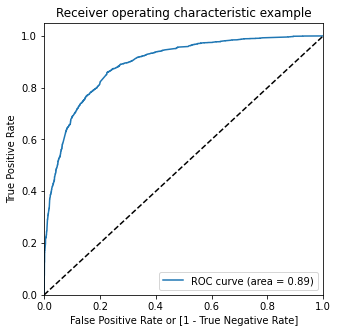

In [1391]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Step 10: Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [1392]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.694944,1381,1,1,1,1,1,1,1,1,0,0,0
1,1,0.341146,9105,0,1,1,1,1,0,0,0,0,0,0
2,0,0.050494,5851,0,1,0,0,0,0,0,0,0,0,0
3,0,0.701386,4310,1,1,1,1,1,1,1,1,1,0,0
4,1,0.919767,5826,1,1,1,1,1,1,1,1,1,1,1


In [1393]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386840  1.000000  0.000000
0.1   0.1  0.639731  0.973333  0.429263
0.2   0.2  0.761488  0.918384  0.662503
0.3   0.3  0.802126  0.867879  0.760642
0.4   0.4  0.815098  0.773333  0.841448
0.5   0.5  0.817130  0.705859  0.887331
0.6   0.6  0.810878  0.638788  0.919449
0.7   0.7  0.784776  0.530505  0.945195
0.8   0.8  0.760081  0.433131  0.966352
0.9   0.9  0.719287  0.293333  0.988019


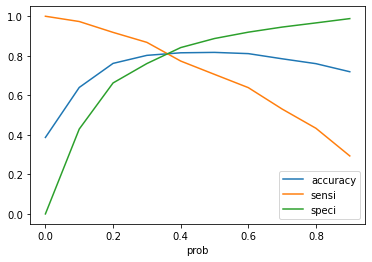

In [1394]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [1395]:
# Let us make the final prediction using 0.4 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.694944,1381,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.341146,9105,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.050494,5851,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.701386,4310,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.919767,5826,1,1,1,1,1,1,1,1,1,1,1,1


In [1396]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.694944,1381,1,1,1,1,1,1,1,1,0,0,0,1,69
1,1,0.341146,9105,0,1,1,1,1,0,0,0,0,0,0,0,34
2,0,0.050494,5851,0,1,0,0,0,0,0,0,0,0,0,0,5
3,0,0.701386,4310,1,1,1,1,1,1,1,1,1,0,0,1,70
4,1,0.919767,5826,1,1,1,1,1,1,1,1,1,1,1,1,92
5,0,0.053305,3749,0,1,0,0,0,0,0,0,0,0,0,0,5
6,0,0.059801,7382,0,1,0,0,0,0,0,0,0,0,0,0,6
7,1,0.533695,686,1,1,1,1,1,1,1,0,0,0,0,1,53
8,0,0.145643,437,0,1,1,0,0,0,0,0,0,0,0,0,15
9,0,0.198589,4684,0,1,1,0,0,0,0,0,0,0,0,0,20


In [1397]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1946
0     529
Name: final_predicted, dtype: int64

In [1398]:
# check the precentage of final_predicted conversions

1946/float(1946+529)

0.7862626262626262

#### Hence we can see that the final prediction of conversions have a target of 79% (78.6%) conversion as per the X Educations CEO's requirement . Hence this is a good model.


#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [1399]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8116598937167865

In [1400]:
confusionmatrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusionmatrix

array([[3247,  676],
       [ 529, 1946]], dtype=int64)

In [1401]:
TP = confusionmatrix[1,1] # true positive 
TN = confusionmatrix[0,0] # true negatives
FP = confusionmatrix[0,1] # false positives
FN = confusionmatrix[1,0] # false negatives

In [1402]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7862626262626262

In [1403]:
# Let us calculate specificity

TN / float(TN+FP)

0.8276828957430538

In [1404]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.1723171042569462


In [1405]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7421815408085431


In [1406]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8599046610169492


#### Metrics - Precision and Recall

In [1407]:
#Looking at the confusion matrix again

confusionmatrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusionmatrix

array([[3481,  442],
       [ 728, 1747]], dtype=int64)

In [1408]:
from sklearn.metrics import precision_score, recall_score

In [1409]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7980813156692553

In [1410]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7058585858585859

#### Precision and recall tradeoff

In [1411]:
from sklearn.metrics import precision_recall_curve

In [1412]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       0
 4       1
        ..
 6393    1
 6394    0
 6395    1
 6396    0
 6397    0
 Name: Converted, Length: 6398, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6393    1
 6394    0
 6395    0
 6396    0
 6397    0
 Name: predicted, Length: 6398, dtype: int64)

In [1413]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

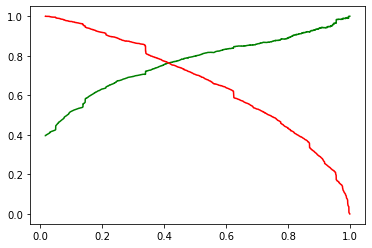

In [1414]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [1415]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [1416]:
## Substituting all the columns in the final train model
col = X_train.columns

In [1417]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Do Not Email,Total Time Spent on Website,LeadSource_Olark Chat,LeadSource_Reference,LeadSource_Welingak Website,LastActivity_Email Opened,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Unreachable
1171,1.0,0,0.700498,0,0,0,0,0,0,0,0,0,0
3071,1.0,0,0.210240,0,0,0,0,1,1,0,1,0,0
716,1.0,0,0.076575,0,0,0,1,0,1,0,1,0,0
1583,1.0,0,0.731763,0,0,0,1,0,0,0,1,0,0
7126,1.0,0,0.746262,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.0,0,0.005437,0,0,0,0,0,0,0,1,0,0
2604,1.0,0,0.000000,0,0,0,1,0,0,0,1,0,0
5156,1.0,1,0.055279,0,0,0,0,0,0,0,1,0,0
3414,1.0,0,0.821024,0,0,0,1,0,0,0,0,0,0


In [1418]:
X_test_sm = sm.add_constant(X_test)

In [1419]:
y_test_pred = res.predict(X_test_sm)

In [1420]:
y_test_pred[:10]

1171    0.694945
3071    0.175290
716     0.035149
1583    0.683837
7126    0.815394
7956    0.092398
2846    0.152096
7833    0.374847
5474    0.899297
8787    0.976095
dtype: float64

In [1421]:
# Converting y_pred to a dataframe which is an array

y_pred_data = pd.DataFrame(y_test_pred)

In [1422]:
# Let's see the head

y_pred_data.head()

,0
1171,0.694945
3071,0.175290
716,0.035149
1583,0.683837
7126,0.815394


In [1423]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1424]:
#Putting LeadID to index
y_test_df['LeadId'] = y_test_df.index


In [1425]:
# Removing index for both dataframes to append them side by side 

y_pred_data.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1426]:
# Appending y_test_df and y_pred_data

y_pred_final = pd.concat([y_test_df, y_pred_data],axis=1)

In [1427]:

y_pred_final.head()

,Converted,LeadId,0
0,1,1171,0.694945
1,0,3071,0.175290
2,0,716,0.035149
3,0,1583,0.683837
4,1,7126,0.815394


In [1428]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1429]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [1430]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.4%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [1431]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,1171,1,0.694945,1
1,3071,0,0.175290,0
2,716,0,0.035149,0
3,1583,0,0.683837,1
4,7126,1,0.815394,1


In [1432]:
# calculate the lead score
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,1171,1,0.694945,1,69
1,3071,0,0.175290,0,18
2,716,0,0.035149,0,4
3,1583,0,0.683837,1,68
4,7126,1,0.815394,1,82
5,7956,0,0.092398,0,9
6,2846,0,0.152096,0,15
7,7833,1,0.374847,0,37
8,5474,0,0.899297,1,90
9,8787,1,0.976095,1,98


In [1433]:
# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    808
0    240
Name: final_predicted, dtype: int64

In [1434]:
# check the precentage of final_predicted conversions on test data

808/float(808+240)

0.7709923664122137

#### Hence we can see that the final prediction of conversions have a target rate of 78% (77.09%)


#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [1435]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7994896099161501

In [1436]:
confusion1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion1

array([[1385,  310],
       [ 240,  808]], dtype=int64)

In [1437]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [1438]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7709923664122137

In [1439]:
# Let us calculate specificity
TN / float(TN+FP)

0.8171091445427728

#### Precision and Recall metrics for the test set

In [1440]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7227191413237924
recall  0.7709923664122137


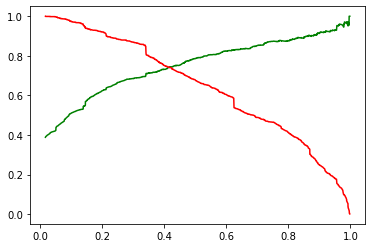

In [1441]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
  
- Accuracy, Sensitivity and Specificity values of test set are around 80%, 77.09% and 82% which are approximately closer to 
  the respective values calculated using trained set.
  
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 79%
  
- Hence overall this model seems to be good.  

It was found that the variables that mattered the most in the potential buyers are:

- The total time spend on the Website.
- Do not Email
- When the lead source was:
a. Olark Chat
b. Reference
c. Welingak Website
- When the last activity was:
a. SMS
b. Email opened
- When the last Notable activity was:
a. Modified
b. Unreachable
c. Olark Chat Conversation
- When their current occupation is as a working professional and also has no information

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.